In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import sys

sys.path.append("../")
import vuong_tests

In [2]:
#generate the sample
def gen_data(beta=3):
    nobs = 1000
    x = np.random.uniform(low=-3., high=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1*(1 + beta * x[:,1] + e >= 0) 
    return y,x,nobs

yn,xn,nobs = gen_data()

In [3]:
def compute_llr(yn,xn):
    x1n,x2n = xn[:,0:2],xn[:,1:3]
    model1 = sm.Probit(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    ll1 = model1.loglikeobs(model1_fit.params)

    model2 = sm.Probit(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    ll2 = model2.loglikeobs(model2_fit.params)

    llr = ll1.sum() - ll2.sum()
    omega2 = (ll1- ll2).var()
    return llr,np.sqrt(omega2)

yn,xn,nobs = gen_data()
print(compute_llr(yn,xn))

(0.22197705635670673, 0.023153797202588644)


0
0


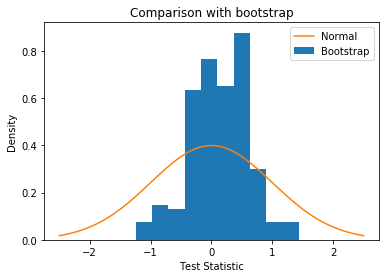

In [4]:
yn,xn,nobs = gen_data()
print(vuong_tests.bootstrap_test(yn,xn,nobs,compute_llr,hist=True))
print(vuong_tests.regular_test(yn,xn,nobs,compute_llr,hist=True))

plt.title("Comparison with bootstrap")
plt.xlabel("Test Statistic")
plt.ylabel("Density")
plt.legend()
plt.savefig('../figs/bootstrap_compare10')
plt.show()

In [6]:
reg,boot1,boot2, llr, omega = vuong_tests.monte_carlo(100,gen_data,compute_llr,use_boot2=True)
print("reg: %s, boot1: %s, boot2: %s, llr:%s, omega:%s"%(reg,boot1,boot2,llr, omega))

reg: [1. 0. 0.], boot1: [0.92 0.04 0.04], boot2: [0.99 0.01 0.  ], llr:-0.010409967076491854, omega:0.04142777117132642


In [7]:
def setup_shi(yn,xn):
    x1n,x2n = xn[:,0:2],xn[:,1:3]
    model1 = sm.Probit(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    #print(model1_fit.params)
    ll1 = model1.loglikeobs(model1_fit.params)
    grad1 =  model1.score_obs(model1_fit.params)
    hess1 =  model1.hessian(model1_fit.params)
    
    model2 = sm.Probit(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    #print(model2_fit.params)
    ll2 = model2.loglikeobs(model2_fit.params)
    grad2 =  model2.score_obs(model2_fit.params)
    hess2 =  model2.hessian(model2_fit.params)
    
    k1 = len(model1_fit.params)
    k2 = len(model2_fit.params)
    return ll1,grad1,hess1,ll2,k1, grad2,hess2,k2 

In [8]:
shi_result = vuong_tests.monte_carlo_shi(100,setup_shi,gen_data)
print(shi_result)

[1. 0. 0.]


In [9]:
#generate the sample
def gen_data(beta=3):
    nobs = 1000
    #x = np.random.normal(low=-3., high=3., size=(nobs,3))
    x = np.random.normal(scale=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1*(1 + .1*x[:,0] + beta * x[:,1] + e >= 0)
    return y,x,nobs

reg,boot1,boot2, llr, omega = vuong_tests.monte_carlo(100,gen_data,compute_llr,use_boot2=True)
print("reg: %s, boot1: %s, boot2: %s, llr:%s, omega:%s"%(reg,boot1,boot2,llr, omega))
shi_result = vuong_tests.monte_carlo_shi(100,setup_shi,gen_data)
print(shi_result)

reg: [0.92 0.08 0.  ], boot1: [0.39 0.61 0.  ], boot2: [0.79 0.21 0.  ], llr:3.9582659377473526, omega:0.09180255239381198
[1. 0. 0.]


In [10]:
#generate the sample
def gen_data(beta=3):
    nobs = 1000
    #x = np.random.normal(low=-3., high=3., size=(nobs,3))
    x = np.random.normal(scale=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1*(1 + 1*x[:,2] + 1*x[:,0] + beta * x[:,1] + e >= 0)
    return y,x,nobs

reg,boot1,boot2, llr, omega = vuong_tests.monte_carlo(100,gen_data,compute_llr,use_boot2=True)
print("reg: %s, boot1: %s, boot2: %s, llr:%s, omega:%s"%(reg,boot1,boot2,llr, omega))
shi_result = vuong_tests.monte_carlo_shi(100,setup_shi,gen_data)
print(shi_result)

reg: [0.96 0.03 0.01], boot1: [0.96 0.03 0.01], boot2: [0.95 0.03 0.02], llr:-1.6750583644917227, omega:0.5622999787523827
[0.99 0.   0.01]


In [11]:
#generate the sample
def gen_data(beta=1):
    nobs = 1000
    #x = np.random.normal(low=-3., high=3., size=(nobs,3))
    x = np.random.normal(scale=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1*(1 + beta * x[:,1] + e >= 0)
    return y,x,nobs

reg,boot1,boot2, llr, omega = vuong_tests.monte_carlo(100,gen_data,compute_llr,use_boot2=True)
print("reg: %s, boot1: %s, boot2: %s, llr:%s, omega:%s"%(reg,boot1,boot2,llr, omega))
shi_result = vuong_tests.monte_carlo_shi(100,setup_shi,gen_data)
print(shi_result)

reg: [1. 0. 0.], boot1: [0.93 0.03 0.04], boot2: [1. 0. 0.], llr:-0.11593424200517063, omega:0.03668878013780533
[1. 0. 0.]


In [12]:
#generate the sample
def gen_data(beta=3):
    nobs = 1000
    #x = np.random.normal(low=-3., high=3., size=(nobs,3))
    x = np.random.normal(scale=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1*(1 + .01*x[:,0] + beta * x[:,1] + e >=0)
    return y,x,nobs

reg,boot1,boot2, llr, omega = vuong_tests.monte_carlo(100,gen_data,compute_llr,use_boot2=True)
print("reg: %s, boot1: %s, boot2: %s, llr:%s, omega:%s"%(reg,boot1,boot2,llr, omega))
shi_result = vuong_tests.monte_carlo_shi(100,setup_shi,gen_data)
print(shi_result)

reg: [1. 0. 0.], boot1: [0.94 0.03 0.03], boot2: [1. 0. 0.], llr:0.06933775621556322, omega:0.039868227064493306
[1. 0. 0.]
